# Exploratory Data Analysis basics

**We are using the Iris dataset for our analysis**

***Steps in EDA***
1. Provide descriptions of your sample and features
2. Check for missing data
3. Identify the shape of your data
4. Identify significant correlations
5. Spot/deal with outliers in the dataset


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing

#There are two different ways to load the iris dataset. First, from sklearn:
iris=load_iris()
print(iris.DESCR)

df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 
df.head()

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
# Second, from a CSV file
df = pd.read_csv("Iris.csv")
 
# Printing top 5 rows
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Providing Descriptions of our sample

In [3]:
#How many rows and columns?
df.shape

(150, 6)

In [4]:
#what type of data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Summary statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data = df.drop_duplicates(subset ="Species")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [8]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
#Is our data balanced?
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## 2. Check for missing data

In [10]:
#Checking for null/missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df=df.dropna().drop_duplicates()
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
# Type casting of column data into float. 
df=df.astype({'PetalWidthCm' : float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df.shape

(150, 6)

## 3. Visualization (identify the shape of your data)

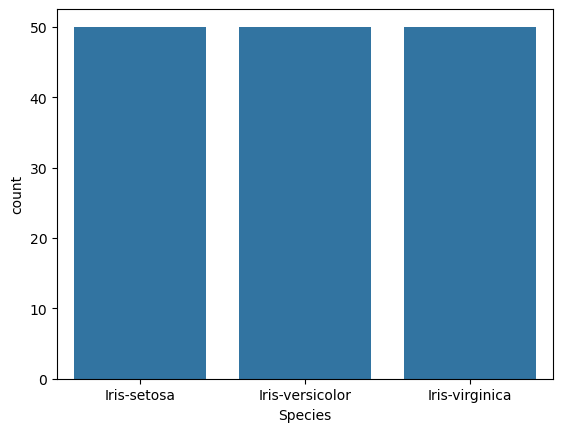

In [15]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
 
sns.countplot(x='Species', data=df, )
plt.show()

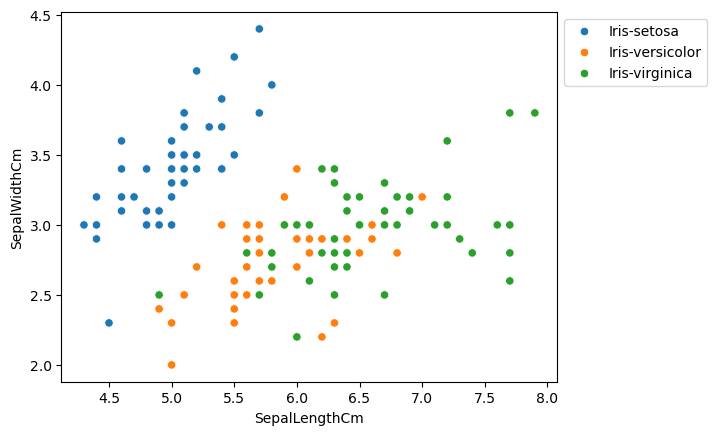

In [16]:
#Relation between variables
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

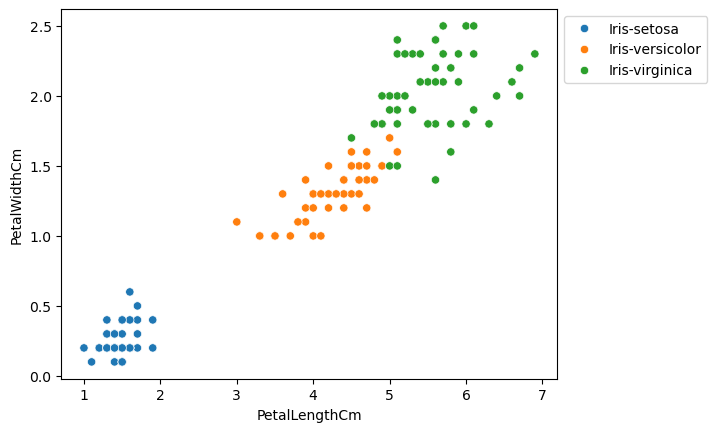

In [17]:
#Comparing Petal Length and Petal Width
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

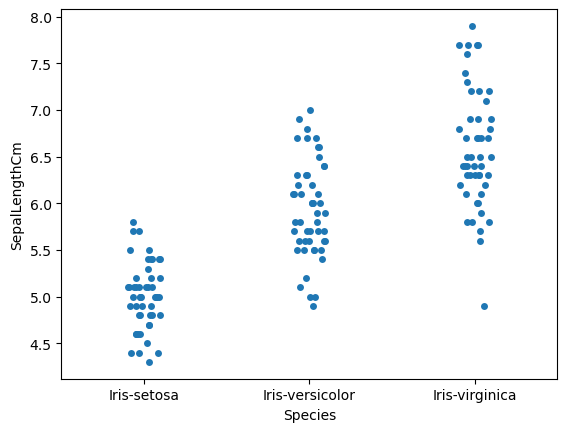

In [18]:
sns.stripplot(y ='SepalLengthCm', x = 'Species', data = df)
plt.show()

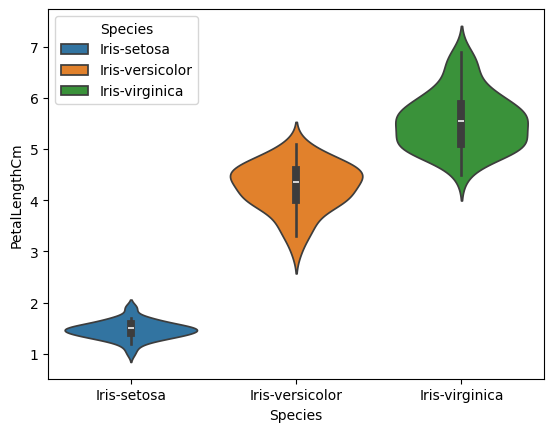

In [19]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, hue="Species", legend="full")
plt.show()

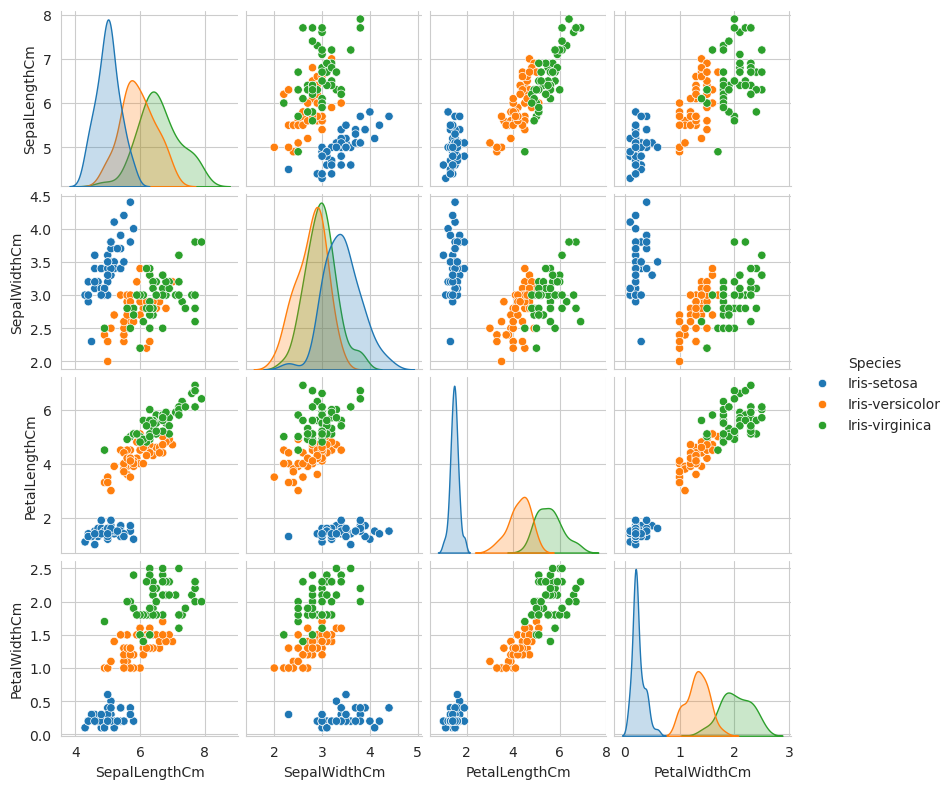

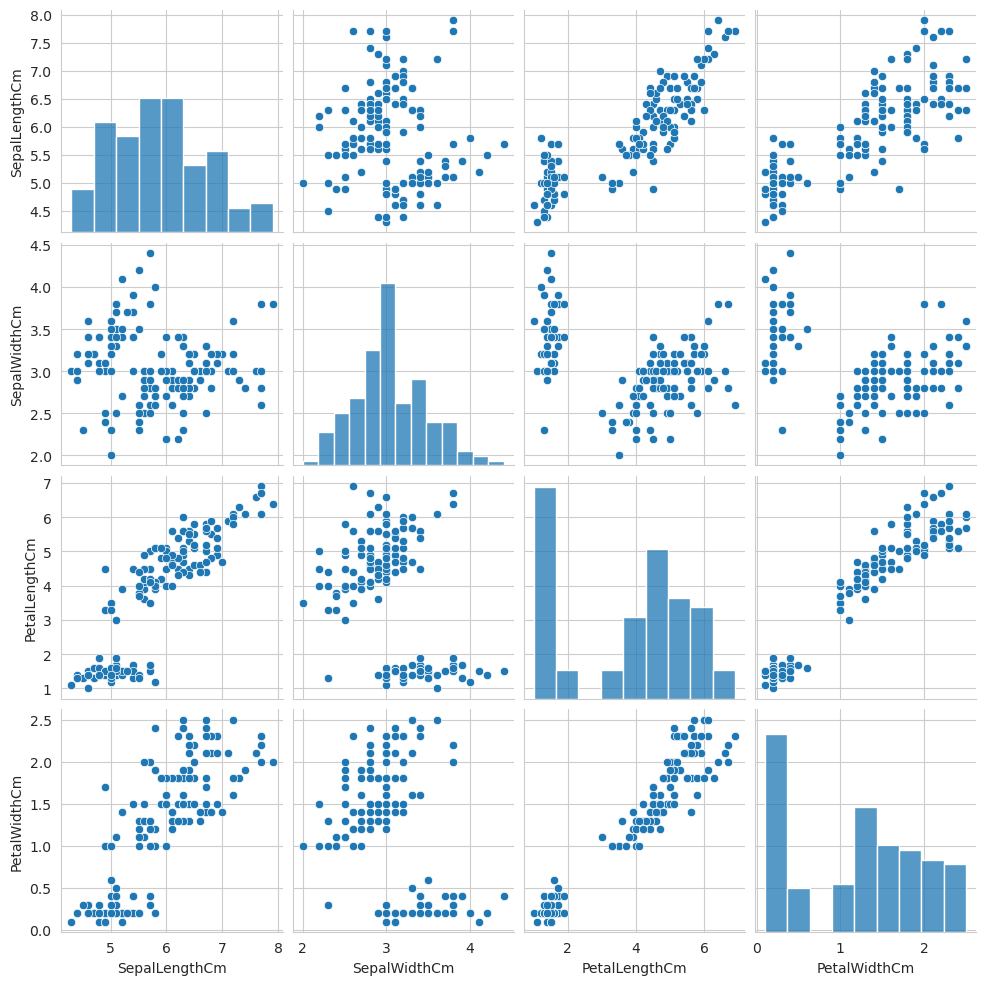

In [20]:
#compare all the variables
sns.set_style('whitegrid')
sns.pairplot(df.drop(['Id'], axis = 1), hue='Species', height=2)
sns.pairplot(df.drop(['Id'], axis = 1))

plt.show()

# Do you see why this is wrong? 
# sns.pairplot(df, hue='Species', height=2)
#This statement has whole df as a input data and It contains id as well. Because of this id, 5 extra plot will get generated. 

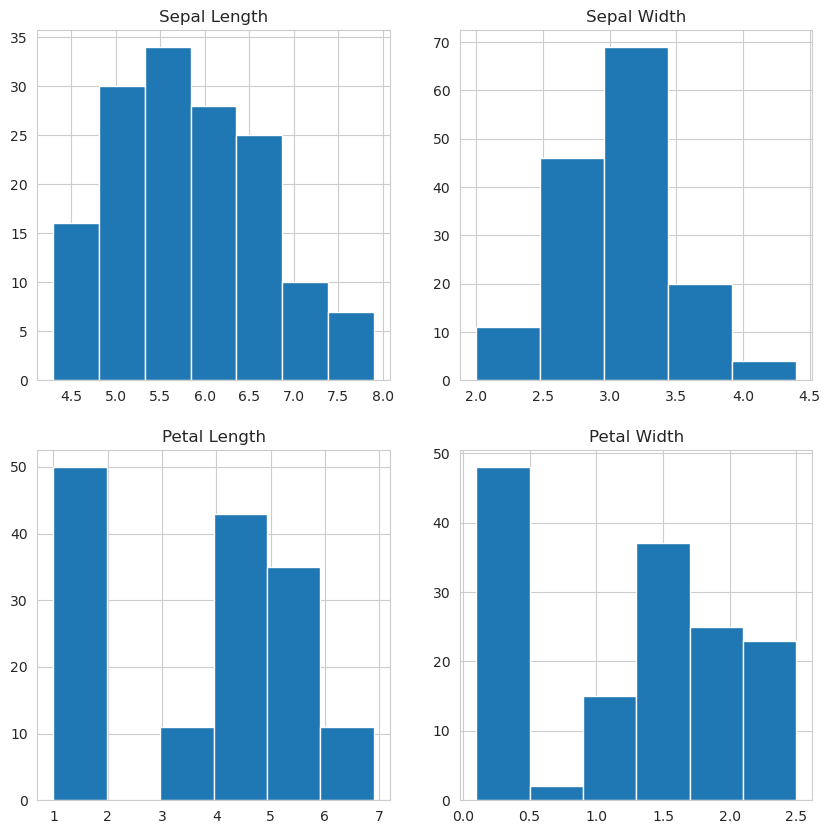

In [21]:
#histograms
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5)
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6)
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6)

plt.show()

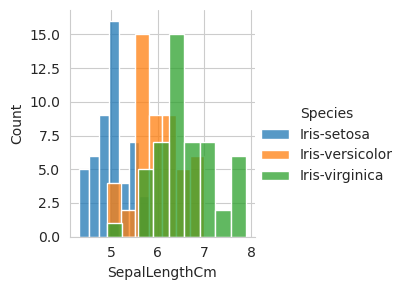

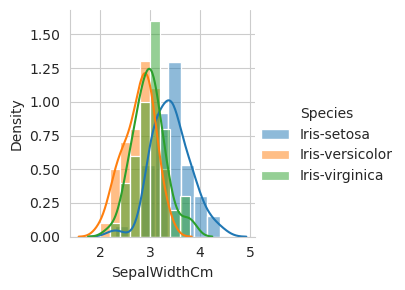

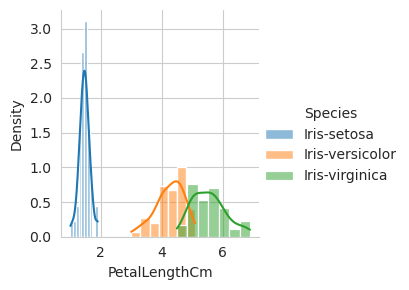

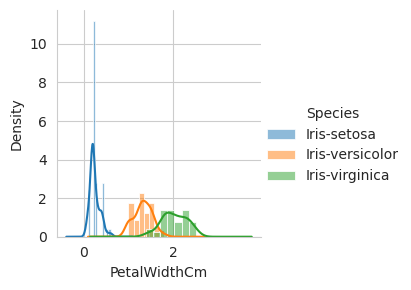

In [22]:
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "SepalLengthCm").add_legend()
plt.show()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "SepalWidthCm", kde=True, stat="density", kde_kws=dict(cut=3)).add_legend()
plt.show()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "PetalLengthCm", kde=True, stat="density").add_legend()
plt.show()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "PetalWidthCm", kde=True, stat="density", kde_kws=dict(cut=10)).add_legend()
plt.show()

## 3D plotting

In [23]:
#May have to uncomment to install plotly
#pip install plotly

In [24]:
#3D plot
import plotly.express as px
fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',color='Species')
fig.show()

## 4. Correlation

In [25]:
print(df.drop(columns="Id").corr(numeric_only=True, method="pearson"))
df.drop(columns="Id").corr(numeric_only=True)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


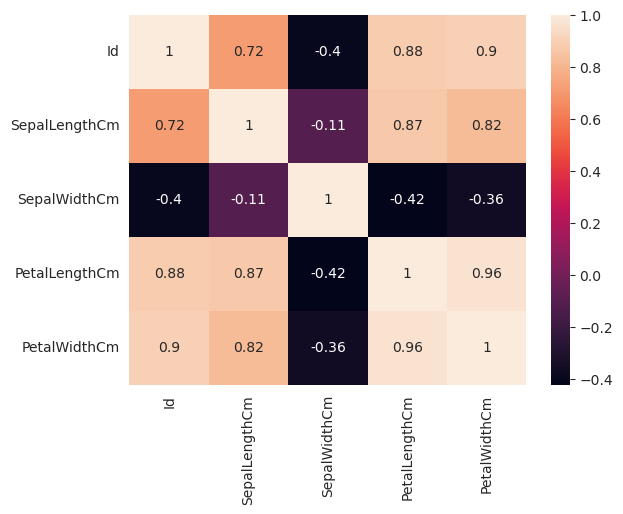

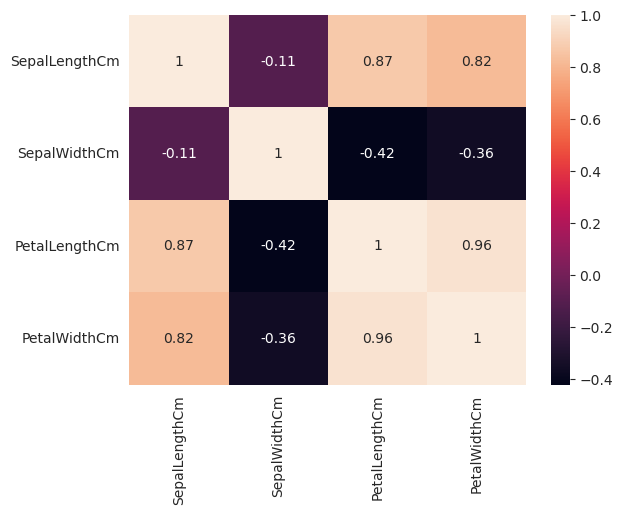

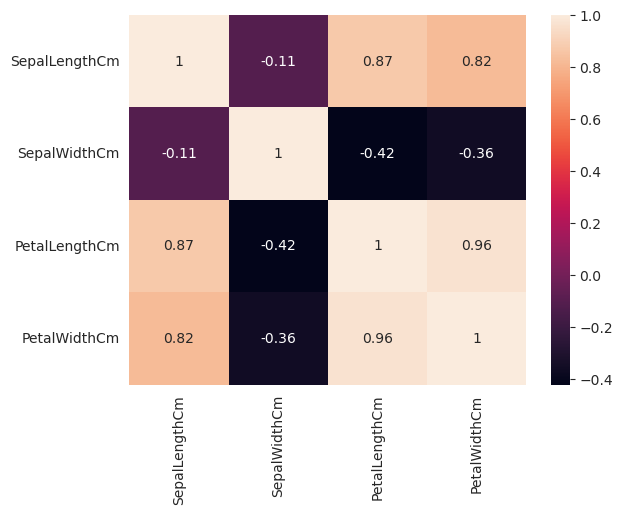

In [26]:
# Not the right way. Why?
sns.heatmap(df.corr(method='pearson', numeric_only=True), annot = True);
 
plt.show()

sns.heatmap(df.corr(numeric_only=True).drop(
  ['Id'], axis=1).drop(['Id'], axis=0),
            annot = True)

plt.show()

sns.heatmap(df.drop(columns="Id").corr(numeric_only=True), annot=True)
 
plt.show()

## 5. Detecting/removing  outliers

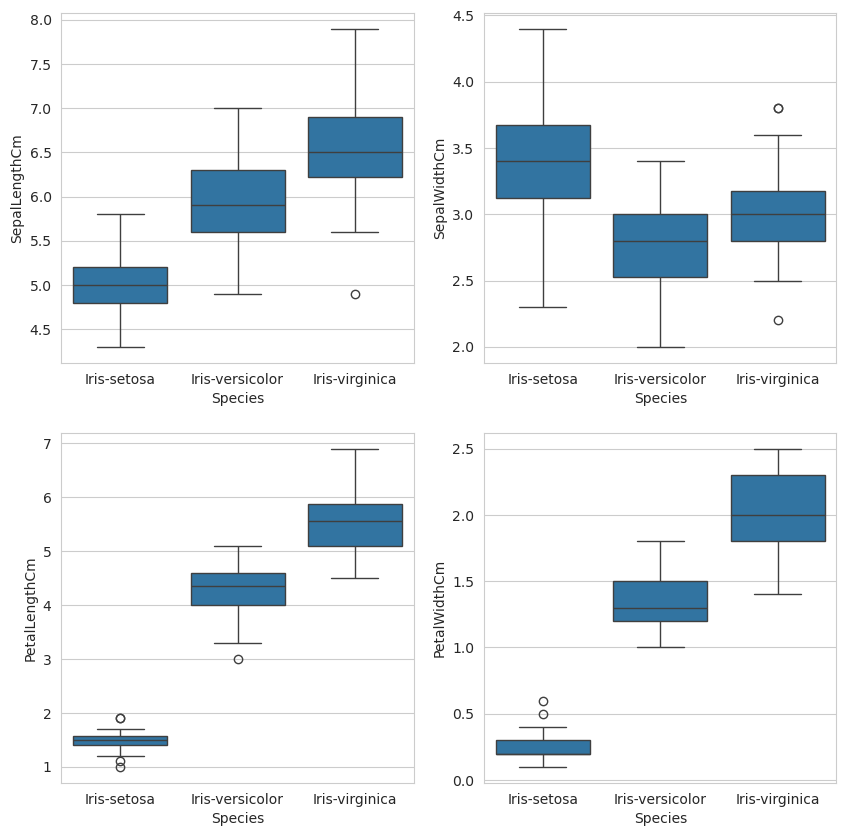

In [27]:
#/boxplots
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')
 
plt.subplot(222)
graph('SepalWidthCm')
 
plt.subplot(223)
graph('PetalLengthCm')
 
plt.subplot(224)
graph('PetalWidthCm')
 
plt.show()

<Axes: xlabel='SepalWidthCm'>

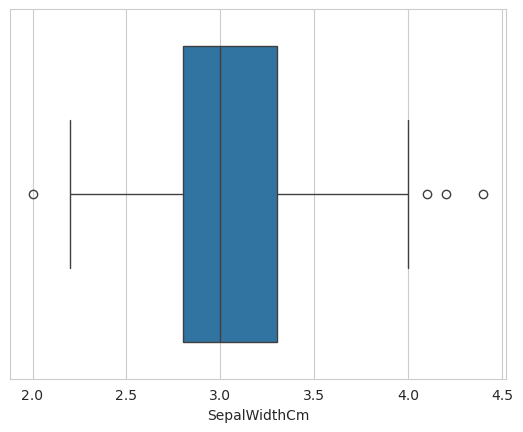

In [28]:
sns.boxplot(x='SepalWidthCm', data=df)

Q1 2.8, Q3 3.3, Inter-Quartile Range 0.5
Old Shape:  (150, 6)
lower and upper bounds 2.05 4.05
lower (array([60]),), upper (array([15, 32, 33]),)
New Shape:  (146, 6)


[]

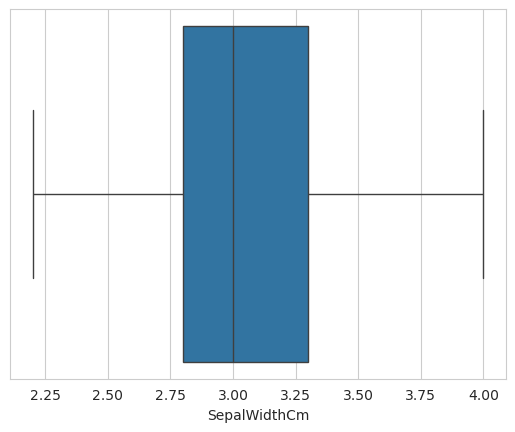

In [29]:
#remove outliers

# WARNING! WARNING!  This example is INVALID! For Illustration Only!
# look at individual species. There are no outliers for Setosa or Versicolor,
# yet we are throwing away instances of those species.

# IQR
Q1 = np.percentile(df['SepalWidthCm'], 25,
                interpolation = 'midpoint')
 
Q3 = np.percentile(df['SepalWidthCm'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1

print("Q1 {}, Q3 {}, Inter-Quartile Range {}".format(Q1, Q3, IQR)) 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))

print("lower and upper bounds", Q1-1.5*IQR, Q3+1.5*IQR)
print ("lower {}, upper {}".format(lower, upper))

# Removing the Outliers
#df.drop(upper[0], inplace = True)
#df.drop(lower[0], inplace = True)
df2=df.drop(upper[0])
df2.drop(lower[0], inplace = True)
 
print("New Shape: ", df2.shape)

#sns.boxplot(x='SepalWidthCm', data=df)
sns.boxplot(x='SepalWidthCm', data=df2)
plt.plot()

Index([], dtype='int64') 0.0


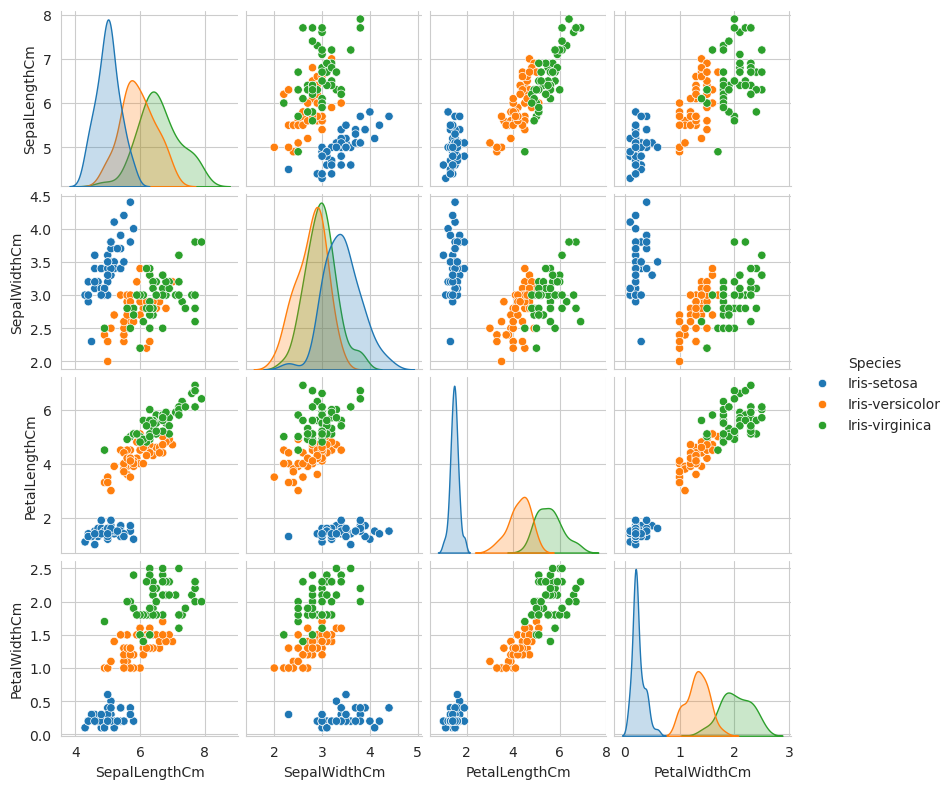

In [30]:
#ignore='''
# Find and drop the PetalWidthCm outlier
outlier = df[(df['Species'] == 'Iris-versicolor') & (df['PetalWidthCm'] > 10)]
outlier_index=outlier.index
outlier_value=outlier['PetalWidthCm'].sum()
print(outlier_index, outlier_value)
#The simplest way to handle an outlier is to just throw it away. 
df2 = df.drop(outlier_index)
sns.pairplot(df2.drop(['Id'], axis = 1), hue='Species', height=2)
#'''